### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [10]:
data = pd.read_csv('data/coupons.csv')

In [11]:
data.shape[0]

12684

In [12]:
data.shape
data.dtypes


destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

2. Investigate the dataset for missing or problematic data.

In [14]:
print(data.isnull().sum())

#As per this data there are several rows with blank spaces. We cannot get rid of those cols. as they are useful to tell us that these people have no accepted any cols. 
#We need to get rid of blanks to make the data consistent and easy to query


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [16]:
#data=data['Bar'].isnull().fillna("never")
#data=data.replace(r'^\s*$', "never", regex=True)

#Replacing the blank values with "never"
data=data.replace(np.nan, "never", regex=True)
data.shape

#data=data.apply(lambda x: x.str.strip()).replace('', "never")
data.isnull().sum()


#newdata.head(520)
#data.head(20)


destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [18]:
#sns.countplot(data=data,x='Y')
#coupon_accept=data['Y'].value_counts(normalize=True)*100
#print(coupon_accept)
total_count=data.shape[0]
accept_coupon_count=data.loc[data['Y']==1].shape[0]
proportion_accept_coupon=(accept_coupon_count/total_count)
proportion_accept_coupon

#coupon_accept=data.query('Y==1').count()/data.shape[0]
#print(coupon_accept)

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='coupon'>

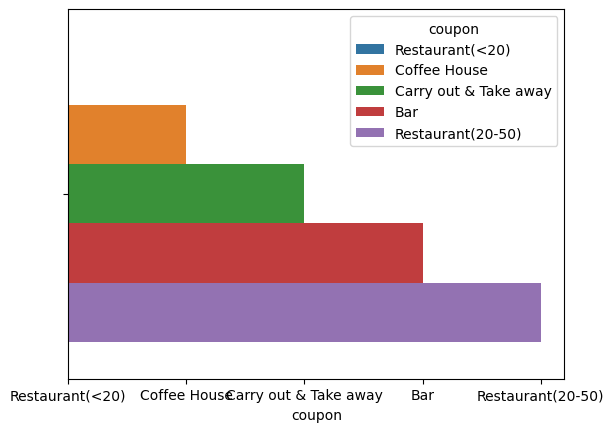

In [20]:
total_coupon_count=data['coupon'].count()
#total_coupon_count - 12684

sns.barplot(data=data,x='coupon',hue='coupon')

6. Use a histogram to visualize the temperature column.

array([[<Axes: title={'center': 'temperature'}>]], dtype=object)

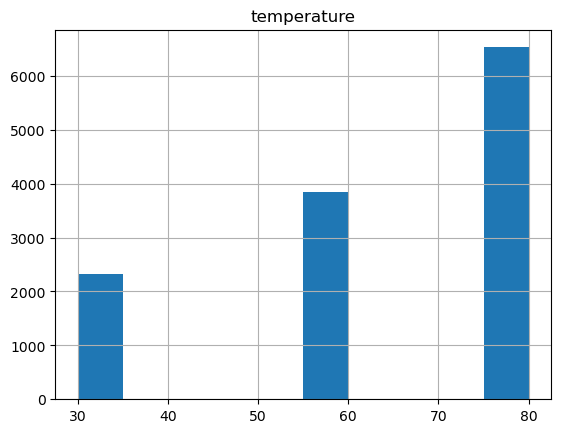

In [22]:
data.hist("temperature")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [24]:
df_bar=data.loc[data['coupon']=='Bar']
df_bar.shape[0] # total bar coupon - 2017

#Total proportion of bar coupons out of total no. of coupon 
bar_coupon_proportion=round(df_bar.shape[0]*100/total_coupon_count)
bar_coupon_proportion # Out of Total coupon distributed, bar coupon is 16% 

16

2. What proportion of bar coupons were accepted?


In [26]:
df_bar=data.loc[data['coupon']=='Bar']
total_bar_coupon=df_bar.shape[0]
#total_bar_coupon
accept_bar_coupon_count=df_bar.loc[df_bar['Y']==1].shape[0]
accept_bar_coupon_count

proportion_bar_accept_coupon=round(accept_bar_coupon_count*100/total_bar_coupon)
proportion_bar_accept_coupon



41

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


C:\Users\aphophalia\AppData\Local\Temp\ipykernel_308\2138761197.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=75)


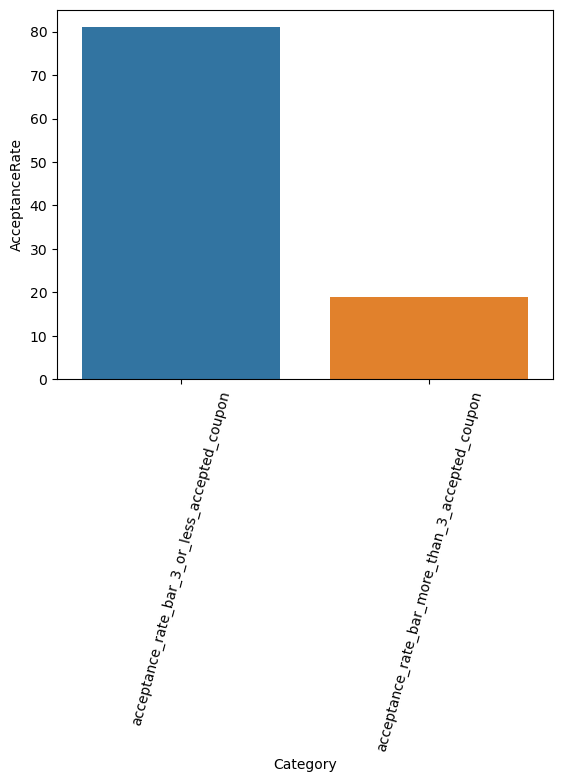

In [98]:
bar_3_or_fewer_list=['less1','never','1~3']

# Drivers who visited the 3 or fewer times and accepted the coupon
drivers_visited_bar_3_or_less_accepted_coupon=df_bar.query('Y==1 and Bar in @bar_3_or_fewer_list')



#Acceptance rate of Drivers who visited the 3 or fewer times and accepted the coupon with total no. of bar coupons accepted
acceptance_rate_bar_3_or_less_accepted_coupon=round(drivers_visited_bar_3_or_less_accepted_coupon.shape[0]*100/accept_bar_coupon_count)

acceptance_rate_bar_3_or_less_accepted_coupon # 81% is the acceptance rate

#################################################################################
# Drivers who visited bar more than 3 times and accepted the coupon
drivers_visited_bar_more_than_3_accepted_coupon=df_bar.query('Y==1 and Bar not in @bar_3_or_fewer_list')
drivers_visited_bar_more_than_3_accepted_coupon.shape[0]


#Acceptance rate of Drivers who visited the 3 or fewer times and accepted the coupon with total no. of bar coupons accepted
acceptance_rate_bar_more_than_3_accepted_coupon=round(drivers_visited_bar_more_than_3_accepted_coupon.shape[0]*100/accept_bar_coupon_count)

acceptance_rate_bar_more_than_3_accepted_coupon # 19% is the acceptance rate 

###################################### Plotting #####################################################
data_new = {
    'Category': ['acceptance_rate_bar_3_or_less_accepted_coupon','acceptance_rate_bar_more_than_3_accepted_coupon'],
    'AcceptanceRate': [acceptance_rate_bar_3_or_less_accepted_coupon,acceptance_rate_bar_more_than_3_accepted_coupon]
    
}
df_3=pd.DataFrame(data_new)

plot=sns.barplot(df_3,x='Category',y='AcceptanceRate',hue='Category')

plot.set_xticklabels(plot.get_xticklabels(), rotation=75)

plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [102]:
df_bar=data.loc[data['coupon']=='Bar']
bar_freq=['never','less1']
age_query_list=['21','below21']


#Drivers who accepted the BAR coupon
all_others_who_accepted_bar_coupon=df_bar.query('Y==1')


# Drivers who visited bar less than once a month and under the age of 25 and "Accepted the coupon" 
drivers_bar_less_than_once_month_below_25_accepted_coupon = df_bar.query('Y==1 and Bar in @bar_freq and age in @age_query_list')
drivers_bar_less_than_once_month_below_25_accepted_coupon

#Acceptance rate of Drivers who visited Bar less than once a month and below 25 with a total no. of bar coupons accepted
acceptance_rate_bar_less_than_once_month_below_25=round(drivers_bar_less_than_once_month_below_25_accepted_coupon.shape[0]*100/all_others_who_accepted_bar_coupon.shape[0])
acceptance_rate_bar_less_than_once_month_below_25

16

In [ ]:
df_bar=data.loc[data['coupon']=='Bar']
bar_freq=['never','less1']
age_query_list=['21','below21']


#Drivers who accepted the BAR coupon
all_others_who_accepted_bar_coupon=df_bar.query('Y==1')


# Drivers who visited bar more than once a month and over the age of 25 and "Accepted the coupon" 
drivers_bar_more_than_once_month_over_25_accepted_coupon = df_bar.query('Y==1 and Bar not in @bar_freq and age not in @age_query_list')

#Acceptance rate of of Drivers who visited Bar more than once a month and over 25 with total no. of bar coupons accepted
acceptance_rate_bar_more_than_once_month_over_25=round(drivers_bar_more_than_once_month_over_25_accepted_coupon.shape[0]*100/all_others_who_accepted_bar_coupon.shape[0])
acceptance_rate_bar_more_than_once_month_over_25 # 35%

# Drivers who visited bar less than once a month and under the age of 25 and "Accepted the coupon" 
drivers_bar_less_than_once_month_below_25_accepted_coupon = df_bar.query('Y==1 and Bar in @bar_freq and age in @age_query_list')
drivers_bar_less_than_once_month_below_25_accepted_coupon

#Acceptance rate of Drivers who visited Bar less than once a month and below 25 with a total no. of bar coupons accepted
acceptance_rate_bar_less_than_once_month_below_25=round(drivers_bar_less_than_once_month_below_25_accepted_coupon.shape[0]*100/all_others_who_accepted_bar_coupon.shape[0])
acceptance_rate_bar_less_than_once_month_below_25 # 16%
#================================================Comparison#############################################################
data_new = {
    'Category': ['acceptance_rate_bar_less_than_once_month_below_25', 'acceptance_rate_bar_more_than_once_month_over_25'],
    'AcceptanceRate': [acceptance_rate_bar_less_than_once_month_below_25,acceptance_rate_bar_more_than_once_month_over_25]
    
}
df_3=pd.DataFrame(data_new)

plot= sns.barplot(df_3,x='Category',y='AcceptanceRate',hue='Category')

plot.set_xticklabels(plot.get_xticklabels(), rotation=75)

plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
bar_freq=['never','less1']

#Drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
drivers_bar_more_than_once_month_no_kid_no_farming_fishery_forestry = df_bar.query('Y==1 and Bar not in @bar_freq and passanger != "Kid(s)" and occupation != "Farming Fishing & Forestry"')
drivers_bar_more_than_once_month_no_kid_no_farming_fishery_forestry

#Acceptance rate of of Drivers who visited Bar more than once a month with no kid  and had occupations other than farming, fishing, or forestry with total no. of bar coupons accepted
acceptance_rate_drivers_bar_more_than_once_month_no_kid_no_farming_fishery_forestry=round(drivers_bar_more_than_once_month_no_kid_no_farming_fishery_forestry.shape[0]*100/all_others_who_accepted_bar_coupon.shape[0])
acceptance_rate_drivers_bar_more_than_once_month_no_kid_no_farming_fishery_forestry # 48%

#All other Drivers who don't go to bars more than once a month and had passengers that were  a kid and had occupations like farming, fishing, or forestry.
drivers_bar_less_than_once_month_with_kid_occuptation_is_farming_fishery_forestry = df_bar.query('Y==1 and Bar in @bar_freq and passanger == "Kid(s)" and occupation == "Farming Fishing & Forestry"')
drivers_bar_less_than_once_month_with_kid_occuptation_is_farming_fishery_forestry

#Acceptance rate of those who don't go to bars more than once a month and had passengers that were  a kid and had occupations like farming, fishing, or forestry with total no. of bar coupons accepted
acceptance_rate_drivers_bar_less_than_once_month_with_kid_occuptation_is_farming_fishery_forestry=round(drivers_bar_less_than_once_month_with_kid_occuptation_is_farming_fishery_forestry.shape[0]*100/all_others_who_accepted_bar_coupon.shape[0])
acceptance_rate_drivers_bar_less_than_once_month_with_kid_occuptation_is_farming_fishery_forestry # 0% - 0.12%
#===========================================Plotting=================================
data_new = {
    'Category': ['acceptance_rate_drivers_bar_less_than_once_month_with_kid_occuptation_is_farming_fishery_forestry', 'acceptance_rate_drivers_bar_more_than_once_month_no_kid_no_farming_fishery_forestry'],
    'AcceptanceRate': [acceptance_rate_drivers_bar_less_than_once_month_with_kid_occuptation_is_farming_fishery_forestry,acceptance_rate_drivers_bar_more_than_once_month_no_kid_no_farming_fishery_forestry]
    
}
df_3=pd.DataFrame(data_new)

plot= sns.barplot(df_3,x='Category',y='AcceptanceRate',hue='Category')

plot.set_xticklabels(plot.get_xticklabels(), rotation=75)

plt.show()


In [104]:
# Grouping by the Occupation, to identify the occupation of the drivers who accepted the coupon most
all_others_who_accepted_bar_coupon.groupby('occupation').count()[['coupon']] #Student

,coupon
occupation,
Architecture & Engineering,18
Arts Design Entertainment Sports & Media,33
Building & Grounds Cleaning & Maintenance,2
Business & Financial,41
Community & Social Services,13
Computer & Mathematical,87
Construction & Extraction,13
Education&Training&Library,40
Farming Fishing & Forestry,4


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [ ]:
bar_freq=['never','less1']
not_widowed_list=['Single','Unmarried partner']

#Drivers who go to bars more than once a month, had passengers who were not a kid, and were not widowed
drivers_bar_more_than_once_month_no_kid_not_widowed = df_bar.query('Y==1 and Bar not in @bar_freq and passanger != "Kid(s)" and maritalStatus == "Married partner"')
#drivers_bar_more_than_once_month_no_kid_not_widowed

#Acceptance rate for Drivers who go to bars more than once a month, had passengers who were not a kid, and were not widowed with total no. of bar coupons accepted
acceptance_rate_drivers_bar_more_than_once_month_no_kid_not_widowed=round(drivers_bar_more_than_once_month_no_kid_not_widowed.shape[0]*100/all_others_who_accepted_bar_coupon.shape[0])
#acceptance_rate_drivers_bar_more_than_once_month_no_kid_not_widowed - 13%


#Drivers who go to bars less than once a month, had passengers that were a kid, and were widowed
drivers_bar_less_than_once_month_with_kid_and_widowed = df_bar.query('Y==1 and Bar in @bar_freq and passanger == "Kid(s)" and maritalStatus in @ not_widowed_list')
#drivers_bar_less_than_once_month_with_kid_and_widowed

#Acceptance rate for Drivers who go to bars less than once a month, had passengers that were a kid, and were widowed with total no. of bar coupons accepted
acceptance_rate_drivers_bar_less_than_once_month_with_kid_and_widowed=round(drivers_bar_less_than_once_month_with_kid_and_widowed.shape[0]*100/all_others_who_accepted_bar_coupon.shape[0])
#acceptance_rate_drivers_bar_less_than_once_month_with_kid_and_widowed - 1%

#===========================================Plotting=================================
data_new = {
    'Category': ['acceptance_rate_drivers_bar_less_than_once_month_with_kid_and_widowed', 'acceptance_rate_drivers_bar_more_than_once_month_no_kid_not_widowed'],
    'AcceptanceRate': [acceptance_rate_drivers_bar_less_than_once_month_with_kid_and_widowed,acceptance_rate_drivers_bar_more_than_once_month_no_kid_not_widowed]
    
}
df_3=pd.DataFrame(data_new)

plot=sns.barplot(df_3,x='Category',y='AcceptanceRate',hue='Category')

plot.set_xticklabels(plot.get_xticklabels(), rotation=75)

plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
################################################################Analysis###############################################
#Coupon Type- 'Bar'
#==========================
# Here are some raw observation based on the above data analysis : 
#	1. Out of total coupon distributed, bar coupon totals up to 16%
#	2. Out of 16% of total bar coupons, 41% of bar coupon was accepted by customers
#	3. Acceptance rate is higher i.e 81% from the customers who visited the bar 3 or less times compare to 18% of the drivers who has previously visited bar more than 3 times
#	4. Acceptance rate is higher i.e 35% among the Drivers who are above 25 years old and go to bar more than once a month compare to 16% of the drivers who are below 25 and go to bar less than once a month
#	5. Acceptance rate is almost 0% among the drivers with Kids as passenger and who go to bar less than once a month with occupation like Farming,Fishing,Forestry compare of 48% among drivers without kids and who go to bar more than once a month and occupation other than Farming, Forestry and fishing 
#   6. Acceptance rate is higher i.e 13% among the drivers who visted bar more than once a month and are not widowed and no passenger as kid compare to 1%

###################In the context of Bar Coupons, here is the summary of my hypothesis###########################################

#	1. Given a Bar coupon, the acceptance rate is moderate i.e 41% among all the drivers in the Dataset.  Chances of People who has not been to bar very often (i.e 3 or less) are high (i.e 81%) compare to drivers who goes to bar more often (more than 3 times) . 
#   2. Chances of drivers accepting the coupon is more who go to bar more than once a month provided 
#	3. If they are above the age of 25
#	4. When they don't have Kids as passenger : 
#		a. occupation other than Farming, Forestry and fishing tends to accept coupons
#		b. Are Not widowed 
#   5. Drivers with Kids as passenger has less than 1% acceptance rate
#   6. max. no drivers who accepted the coupon are Students by occupation (count- 120) 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
#Indepndent analysis of the coupon type "Restaurant(20-50) or we will call it as expensive restaurant" 

In [36]:
# New DataFrame that contains just the "Restaurant(20-50)" coupons.
df_restaurant_20_50=data.loc[data['coupon']=='Restaurant(20-50)']
total_restaurant_20_50=df_restaurant_20_50.shape[0] # total restaurant coupon - 1492
total_restaurant_20_50

#Total proportion of Restaurant(20-50) coupons out of total no. of coupon 
restaurant_20_50_coupon_proportion=round(df_restaurant_20_50.shape[0]*100/total_coupon_count)
restaurant_20_50_coupon_proportion # Out of Total coupon distributed, bar coupon is 12% 

12

In [40]:
#proportion of Restaurant(20-50) coupons were accepted?

all_others_who_accepted_restaurant_20_50_count=df_restaurant_20_50.loc[df_restaurant_20_50['Y']==1].shape[0]
all_others_who_accepted_restaurant_20_50_count # 658

proportion_restaurant_20_50_accept_coupon=round(all_others_who_accepted_restaurant_20_50_count*100/total_restaurant_20_50)
proportion_restaurant_20_50_accept_coupon

44

In [ ]:
#acceptance rate between those who went to a Expensive restaurant 3 or fewer times a month to those who went more.

expensive_restaurant_freq=['less1','never','1~3']

# Drivers who visited Expensive restaurant less than 3 times and accepted the coupon
drivers_visited_exp_restaurant_fewer_than_3_accepted_coupon=df_restaurant_20_50.query('Y==1 and Restaurant20To50 in @expensive_restaurant_freq')
#drivers_visited_exp_restaurant_fewer_than_3_accepted_coupon.shape[0] # 579


#Acceptance rate of Drivers who visited Expensive restaurant 3 or fewer times and accepted the coupon with total no. of expensive restaraunt coupons accepted
acceptance_rate_exp_restaurant_fewer_than_3_accepted_coupon=round(drivers_visited_exp_restaurant_fewer_than_3_accepted_coupon.shape[0]*100/all_others_who_accepted_restaurant_20_50_count)

acceptance_rate_exp_restaurant_fewer_than_3_accepted_coupon # 88% is the acceptance 

# Drivers who visited Expensive restaurant more than 3 times and accepted the coupon
drivers_visited_exp_restaurant_more_than_3_accepted_coupon=df_restaurant_20_50.query('Y==1 and Restaurant20To50 not in @expensive_restaurant_freq')
drivers_visited_exp_restaurant_more_than_3_accepted_coupon.shape[0] # 79


#Acceptance rate of Drivers who visited the more than 3 times and accepted the coupon with total no. of expensive restaurant coupons accepted
acceptance_rate_exp_restaurant_more_than_3_accepted_coupon=round(drivers_visited_exp_restaurant_more_than_3_accepted_coupon.shape[0]*100/all_others_who_accepted_restaurant_20_50_count)

acceptance_rate_exp_restaurant_more_than_3_accepted_coupon # 12% is the acceptance rate 

###################################### Plotting #####################################################
data_new = {
    'Category': ['acceptance_rate_exp_restaurant_fewer_than_3_accepted_coupon','acceptance_rate_exp_restaurant_more_than_3_accepted_coupon'],
    'AcceptanceRate': [acceptance_rate_exp_restaurant_fewer_than_3_accepted_coupon,acceptance_rate_exp_restaurant_more_than_3_accepted_coupon]
    
}
df_3=pd.DataFrame(data_new)

plot= sns.barplot(df_3,x='Category',y='AcceptanceRate',hue='Category')

plot.set_xticklabels(plot.get_xticklabels(), rotation=75)

plt.show()


In [ ]:
#Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others. 

C:\Users\aphophalia\AppData\Local\Temp\ipykernel_308\3343820282.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=75)


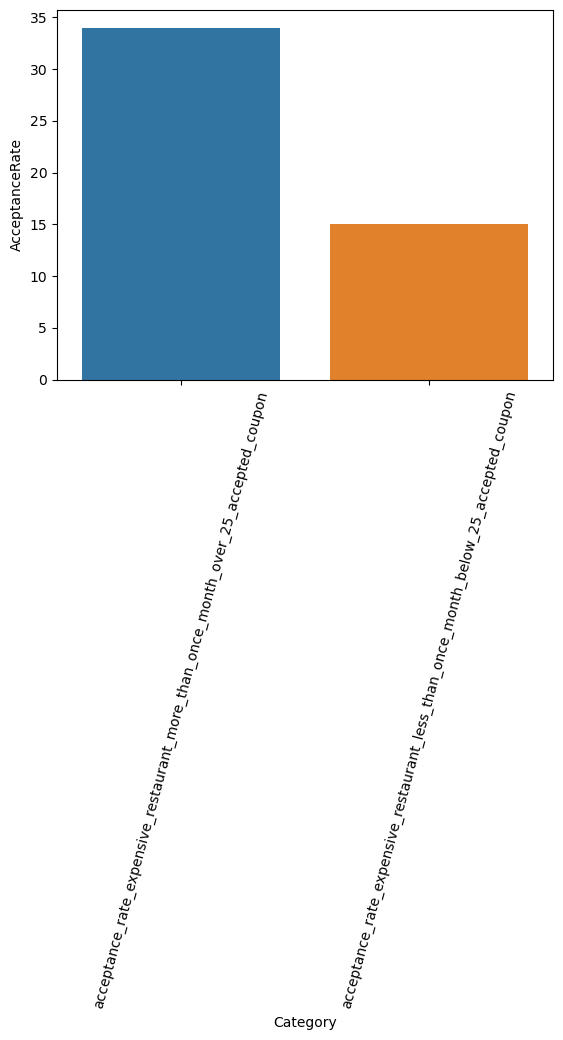

In [48]:
expensive_restaurant_freq=['less1','never']
age_query_list=['21','below21']

# Drivers who visited Expensive restaurant more than once a month and over the age of 25 and "Accepted the coupon" 
drivers_expensive_restaurant_more_than_once_month_over_25_accepted_coupon = df_restaurant_20_50.query('Y==1 and Restaurant20To50 not in @expensive_restaurant_freq and age not in @age_query_list')

#Acceptance rate of Drivers who visited Expensive restaurant more than once a month and over 25 with total no. of bar coupons accepted
acceptance_rate_expensive_restaurant_more_than_once_month_over_25_accepted_coupon=round(drivers_expensive_restaurant_more_than_once_month_over_25_accepted_coupon.shape[0]*100/all_others_who_accepted_restaurant_20_50_count)
acceptance_rate_expensive_restaurant_more_than_once_month_over_25_accepted_coupon # 34%

# Drivers who visited Expensive restaurant less than once a month and under the age of 25 and "Accepted the coupon" 
drivers_expensive_restaurant_less_than_once_month_over_25_accepted_coupon = df_restaurant_20_50.query('Y==1 and Restaurant20To50 in @expensive_restaurant_freq and age  in @age_query_list')
drivers_expensive_restaurant_less_than_once_month_over_25_accepted_coupon #97

#Acceptance rate of Drivers who visited Bar less than once a month and below 25 with a total no. of bar coupons accepted
acceptance_rate_expensive_restaurant_less_than_once_month_below_25_accepted_coupon=round(drivers_expensive_restaurant_less_than_once_month_over_25_accepted_coupon.shape[0]*100/all_others_who_accepted_restaurant_20_50_count)
acceptance_rate_expensive_restaurant_less_than_once_month_below_25_accepted_coupon # 15%
#================================================Comparison#############################################################
data_new = {
    'Category': ['acceptance_rate_expensive_restaurant_more_than_once_month_over_25_accepted_coupon', 'acceptance_rate_expensive_restaurant_less_than_once_month_below_25_accepted_coupon'],
    'AcceptanceRate': [acceptance_rate_expensive_restaurant_more_than_once_month_over_25_accepted_coupon,acceptance_rate_expensive_restaurant_less_than_once_month_below_25_accepted_coupon]
    
}
df_3=pd.DataFrame(data_new)

plot= sns.barplot(df_3,x='Category',y='AcceptanceRate',hue='Category')

plot.set_xticklabels(plot.get_xticklabels(), rotation=75)

plt.show()

In [ ]:
#acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [ ]:
#Drivers who go to Expensive restaurant more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
drivers_expensive_restaurant_more_than_once_month_no_kid_no_farming_fishery_forestry = df_restaurant_20_50.query('Y==1 and Restaurant20To50 not in @expensive_restaurant_freq and passanger != "Kid(s)" and occupation != "Farming Fishing & Forestry"')
drivers_expensive_restaurant_more_than_once_month_no_kid_no_farming_fishery_forestry.shape[0] #255

#Acceptance rate of of Drivers who visited Expensive restaurant more than once a month with no kid  and had occupations other than farming, fishing, or forestry with total no. of bar coupons accepted
acceptance_rate_drivers_expensive_restaurant_more_than_once_month_no_kid_no_farming_fishery_forestry=round(drivers_expensive_restaurant_more_than_once_month_no_kid_no_farming_fishery_forestry.shape[0]*100/all_others_who_accepted_restaurant_20_50_count)
acceptance_rate_drivers_expensive_restaurant_more_than_once_month_no_kid_no_farming_fishery_forestry # 39%

#All other Drivers who don't go to Expensive restaurant more than once a month and had passengers that were  a kid and had occupations like farming, fishing, or forestry.
drivers_expensive_restaurant_less_than_once_month_with_kid_occuptation_is_farming_fishery_forestry = df_restaurant_20_50.query('Y==1 and Restaurant20To50 in @expensive_restaurant_freq and passanger == "Kid(s)" and occupation == "Farming Fishing & Forestry"')
drivers_expensive_restaurant_less_than_once_month_with_kid_occuptation_is_farming_fishery_forestry # 0 

#Acceptance rate of those who don't go to Expensive restaurant more than once a month and had passengers that were  a kid and had occupations like farming, fishing, or forestry with total no. of bar coupons accepted
acceptance_rate_drivers_expensive_restaurant_less_than_once_month_with_kid_occuptation_is_farming_fishery_forestry=round(drivers_expensive_restaurant_less_than_once_month_with_kid_occuptation_is_farming_fishery_forestry.shape[0]*100/all_others_who_accepted_restaurant_20_50_count)
acceptance_rate_drivers_expensive_restaurant_less_than_once_month_with_kid_occuptation_is_farming_fishery_forestry # 0% - 0.12%
#===========================================Plotting=================================
data_new = {
    'Category': ['acceptance_rate_drivers_expensive_restaurant_less_than_once_month_with_kid_occuptation_is_farming_fishery_forestry', 'acceptance_rate_drivers_expensive_restaurant_more_than_once_month_no_kid_no_farming_fishery_forestry'],
    'AcceptanceRate': [acceptance_rate_drivers_expensive_restaurant_less_than_once_month_with_kid_occuptation_is_farming_fishery_forestry,acceptance_rate_drivers_expensive_restaurant_more_than_once_month_no_kid_no_farming_fishery_forestry]
    
}
df_3=pd.DataFrame(data_new)

plot= sns.barplot(df_3,x='Category',y='AcceptanceRate',hue='Category')

plot.set_xticklabels(plot.get_xticklabels(), rotation=75)

plt.show()

In [94]:
# Grouping by the Occupation, to identify the occupation of the drivers who accepted the coupon most
all_others_who_accepted_restaurant_20_50=df_restaurant_20_50.loc[df_restaurant_20_50['Y']==1]
all_others_who_accepted_restaurant_20_50.groupby('occupation').count()[['coupon']] #computer & mathematical

,coupon
occupation,
Architecture & Engineering,8
Arts Design Entertainment Sports & Media,26
Building & Grounds Cleaning & Maintenance,3
Business & Financial,28
Community & Social Services,10
Computer & Mathematical,88
Construction & Extraction,13
Education&Training&Library,43
Farming Fishing & Forestry,1


In [ ]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed

In [ ]:

not_widowed_list=['Single','Unmarried partner']

#Drivers who go to Expensive restaurant more than once a month, had passengers who were not a kid, and were not widowed
drivers_expensive_restaurant_more_than_once_month_no_kid_not_widowed = df_restaurant_20_50.query('Y==1 and Restaurant20To50 not in @expensive_restaurant_freq and passanger != "Kid(s)" and maritalStatus == "Married partner"')
#drivers_expensive_restaurant_more_than_once_month_no_kid_not_widowed.shape[0] # 93

#Acceptance rate for Drivers who go to Expensive restaurant more than once a month, had passengers who were not a kid, and were not widowed with total no. of bar coupons accepted
acceptance_rate_drivers_expensive_restaurant_more_than_once_month_no_kid_not_widowed=round(drivers_expensive_restaurant_more_than_once_month_no_kid_not_widowed.shape[0]*100/all_others_who_accepted_restaurant_20_50_count)
#acceptance_rate_drivers_expensive_restaurant_more_than_once_month_no_kid_not_widowed - 13%


#Drivers who go to Expensive restaurant less than once a month, had passengers that were a kid, and were widowed
drivers_expensive_restaurant_less_than_once_month_with_kid_and_widowed = df_restaurant_20_50.query('Y==1 and Restaurant20To50 in @expensive_restaurant_freq and passanger == "Kid(s)" and maritalStatus in @ not_widowed_list')
#drivers_expensive_restaurant_less_than_once_month_with_kid_and_widowed # 5

#Acceptance rate for Drivers who go to Expensive restaurant less than once a month, had passengers that were a kid, and were widowed with total no. of bar coupons accepted
acceptance_rate_drivers_expensive_restaurant_less_than_once_month_with_kid_and_widowed=round(drivers_expensive_restaurant_less_than_once_month_with_kid_and_widowed.shape[0]*100/all_others_who_accepted_restaurant_20_50_count)
#acceptance_rate_drivers_expensive_restaurant_less_than_once_month_with_kid_and_widowed - # 1%

#===========================================Plotting=================================
data_new = {
    'Category': ['acceptance_rate_drivers_expensive_restaurant_less_than_once_month_with_kid_and_widowed', 'acceptance_rate_drivers_expensive_restaurant_more_than_once_month_no_kid_not_widowed'],
    'AcceptanceRate': [acceptance_rate_drivers_expensive_restaurant_less_than_once_month_with_kid_and_widowed,acceptance_rate_drivers_expensive_restaurant_more_than_once_month_no_kid_not_widowed]
    
}
df_3=pd.DataFrame(data_new)

plot= sns.barplot(df_3,x='Category',y='AcceptanceRate',hue='Category')
plot.set_xticklabels(plot.get_xticklabels(), rotation=75)

plt.show()

In [ ]:
################################################################Analysis###############################################

#Coupon Type- 'Restaurant(20-50)' -> We will call it as "Expensive Restaurant coupon in our analysis"

# Here are some raw observation based on the above data analysis : 
#	1. Out of total coupon distributed, expensive restaurant coupon totals up to 12%
#	2. Out of 12% of total restaurant coupon , 44% of expensive restaurant coupon was accepted by customers
#	3. Acceptance rate is higher i.e 88% from the customers who visited the expensive restaurant 3 or less times compare to 12% of the drivers who has previously visited expensive restaurant more than 3 times
#	4. Acceptance rate is higher i.e 34% among the Drivers who are above 25 years old and go to restaurant coupon more than once a month compared to 15% of the drivers who are below 25 and go to restaurant coupon less than once a month
#	5. Acceptance rate is almost 0% among the drivers with Kids as passenger and who go to restaurant coupon less than once a month with occupation like Farming,Fishing,Forestry compare of 39% among drivers without kids and who go to restaurant coupon more than once a month and occupation other than Farming, Forestry and fishing 
#   6. Acceptance rate is higher i.e 13% among the drivers who visted restaurant coupon more than once a month and are not widowed and no passenger as kid compare to 1%


###################In the context of Expensive Restaurant Coupons, here is the summary of my hypothesis###########################################

#	1. Given a restaurant coupon coupon, the acceptance rate is moderate i.e 44% among all the drivers in the Dataset.  Chances of People who has not been to restaurant coupon very often (i.e 3 or less) are high (i.e 88%) compare to drivers who goes to restaurant coupon more often (more than 3 times) . 
#   2. Chances of drivers accepting the coupon is more who go to restaurant coupon more than once a month provided 
#	1. If they are above the age of 25
#	2. When they don't have Kids as passenger : 
#		a. occupation other than Farming, Forestry and fishing tends to accept coupons
#		b. Are Not widowed 
#   5. Drivers with Kids as passenger has less than 1% acceptance rate
#   6. Maximum no. of drivers who accepted the coupon is from the occupation "Computer & Mathematical" (count - 88) 